# Clustering of Documents:

### What this notebook does (as of now): 
Loads the text files from a corpus, preprocesses the files, breaks the books into small paragraphs or chunks. TF-IDF vectors have been calculated for each chunk. K Means clustering was performed based on these TF-IDF vectors. We started with K=10 and will try larger and smaller K's. 

We begin by importing libraries and modules that I will use in this section. 

In [1]:
import nltk
import os
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS
import random
from scipy.cluster.hierarchy import ward, dendrogram

In [2]:
lemmatizer = nltk.wordnet.WordNetLemmatizer()

### Loading the text and Pre-Processing.

A function to load a book given the folder and filename. 

In [3]:
def loadBook(folder,filename):
    filepath=folder + "/" + filename
    f=open(filepath)
    raw=f.read()
    return(raw)

Basic preprocessing of a book. Stemming needs to be added. 

In [4]:
def preProcess(book):
    book=book.strip()
    words=nltk.word_tokenize(book)
    words=[w.lower() for w in words if w not in stopwords.words('english')]
    words=[lemmatizer.lemmatize(w) for w in words if len(w)>1]
    return(words)

A function that converts a given book into smaller chunks. 

In [5]:
def createChunks(words,filename,text_list,id_list):
    i=0
    count=0
    while(i<len(words)):
        if((i+1000)<len(words)):
            chunk=words[i:i+1000]
            chunk=" ".join(chunk)
        else:
            chunk=words[i:len(words)]
            chunk=" ".join(chunk)
        i=i+1000
        count=count+1
        text_list.append(chunk)
        id_list.append(filename + "-" + str(count))
    return(text_list,id_list)

Loading Karl Marx's books into a list. 

In [6]:
marx_books=[]
marx_id=[]
folder="MarxText"

In [7]:
for file in os.listdir(folder):
    print(file)
    book=loadBook(folder,file)
    words=preProcess(book)
    createChunks(words,file,marx_books,marx_id)

CritiqueofHegel'sPhilosophyOfRight.txt
ThePovertyOfPhilosophy.txt
EconomicPhilosophicManuscripts.txt
TheGermanIdeology.txt
CapitalVol1.txt


Loading Hegel's books into a list. 

In [8]:
hegel_books=[]
hegel_id=[]
folder="HegelText"

In [9]:
for file in os.listdir(folder):
    print(file)
    book=loadBook(folder,file)
    words=preProcess(book)
    createChunks(words,file,hegel_books,hegel_id)

Philosophy of Mind.txt
Science of Logic.txt
Phenomenology of Mind.txt
Philosophy of Spirit.txt


In [10]:
len(hegel_id)

212

In [11]:
len(marx_id)

308

Combining both the lists into one large list.

In [12]:
books=marx_books+hegel_books
ids=marx_id+hegel_id

### TF-IDF calculation

Calculating the TF-IDF matrix using scikit learn's TfidfVectorizer. max_df=0.8 means that any word which is present in more than 80% of the documents will not be present in the final matrix.

In [13]:
tfidfVectorizer=TfidfVectorizer(max_df=0.8)
tfidfMatrix=tfidfVectorizer.fit_transform(books)
tfidfMatrix.shape

(520, 21910)

Calculate a distance matrix where distance between any two vectors is defined by 1-cosineSimilarity. 

In [14]:
dist = 1 - cosine_similarity(tfidfMatrix)
dist.shape

(520, 520)

### Clustering using K-Means

Clustering using K Means. We begin with 10 clusters.

In [15]:
num_of_clusters=10
kmeans=KMeans(n_clusters=num_of_clusters)
kmeans.fit(tfidfMatrix)
clusters=kmeans.labels_.tolist()

Converting to a Pandas Data Frame. 

In [16]:
documents = { 'title': ids,  'text': books, 'cluster': clusters }
documentFrame = pd.DataFrame(documents, index = [clusters])
documentFrame

,cluster,text,title
5,5,marxs critique hegels philosophy right 1843-...,CritiqueofHegel'sPhilosophyOfRight.txt-1
5,5,personal notion short long believed believe ju...,CritiqueofHegel'sPhilosophyOfRight.txt-2
5,5,war radical fact german history came grief the...,CritiqueofHegel'sPhilosophyOfRight.txt-3
5,5,critique hegel 's philosophy right society wit...,CritiqueofHegel'sPhilosophyOfRight.txt-4
5,5,way considering manner speaking there two-fold...,CritiqueofHegel'sPhilosophyOfRight.txt-5
5,5,element state nature real subject case politic...,CritiqueofHegel'sPhilosophyOfRight.txt-6
5,5,existing condition circumstance inasmuch actio...,CritiqueofHegel'sPhilosophyOfRight.txt-7
5,5,counsel actual arbitrary choice willkür in wor...,CritiqueofHegel'sPhilosophyOfRight.txt-8
5,5,arbitrary yet determinate decision sovereign p...,CritiqueofHegel'sPhilosophyOfRight.txt-9
5,5,rather two completely opposed concept sovereig...,CritiqueofHegel'sPhilosophyOfRight.txt-10


If we now want to visualize the clusters in a two dimensional plane, we would have to convert the distance matrix to a two dimensional array. This can be done using scikit learn's multi dimensional scaling. 

In [17]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=7)
transformed = mds.fit_transform(dist)
x=transformed[:, 0]
y=transformed[:, 1]

### Visualization with matplotlib

We first begin by generating as many colours as the number of clusters. And creating names for the clusters. 

In [24]:
num_colours=num_of_clusters
col=mpl.colors.cnames.items()
colours={}
random.seed(1)
i=0
while (i<num_of_clusters):
    c=random.choice(list(col))
    if(c[1] not in colours.keys()):
        colours[i]=c[1]
        i=i+1


cluster_names={}
for i in range(num_of_clusters):
    cluster_names[i]="Cluster-"+str(i)

Creating a data frame which we will use for plotting.

In [25]:
df = pd.DataFrame(dict(x=x, y=y, label=clusters, title=ids)) 
groups = df.groupby('label')

Plotting using matplotlib. 

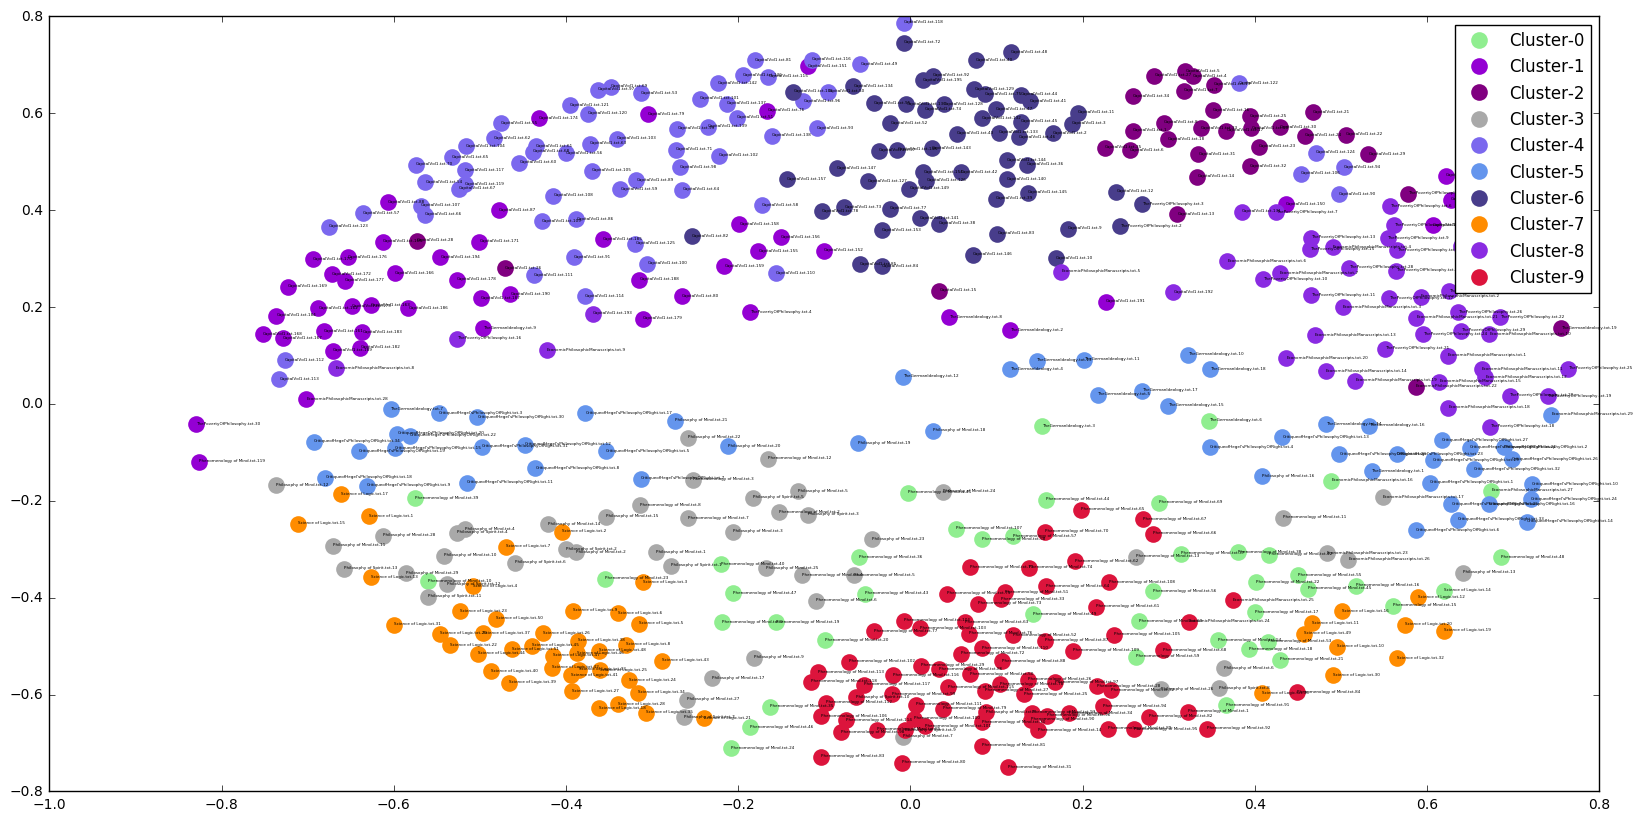

In [26]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10)) # set size
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=colours[name], 
            mec='none')
    
ax.legend(numpoints=1)  #show legend 

for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=3)  


### Ward's Clustering

In [27]:
dist_matrix=ward(dist)

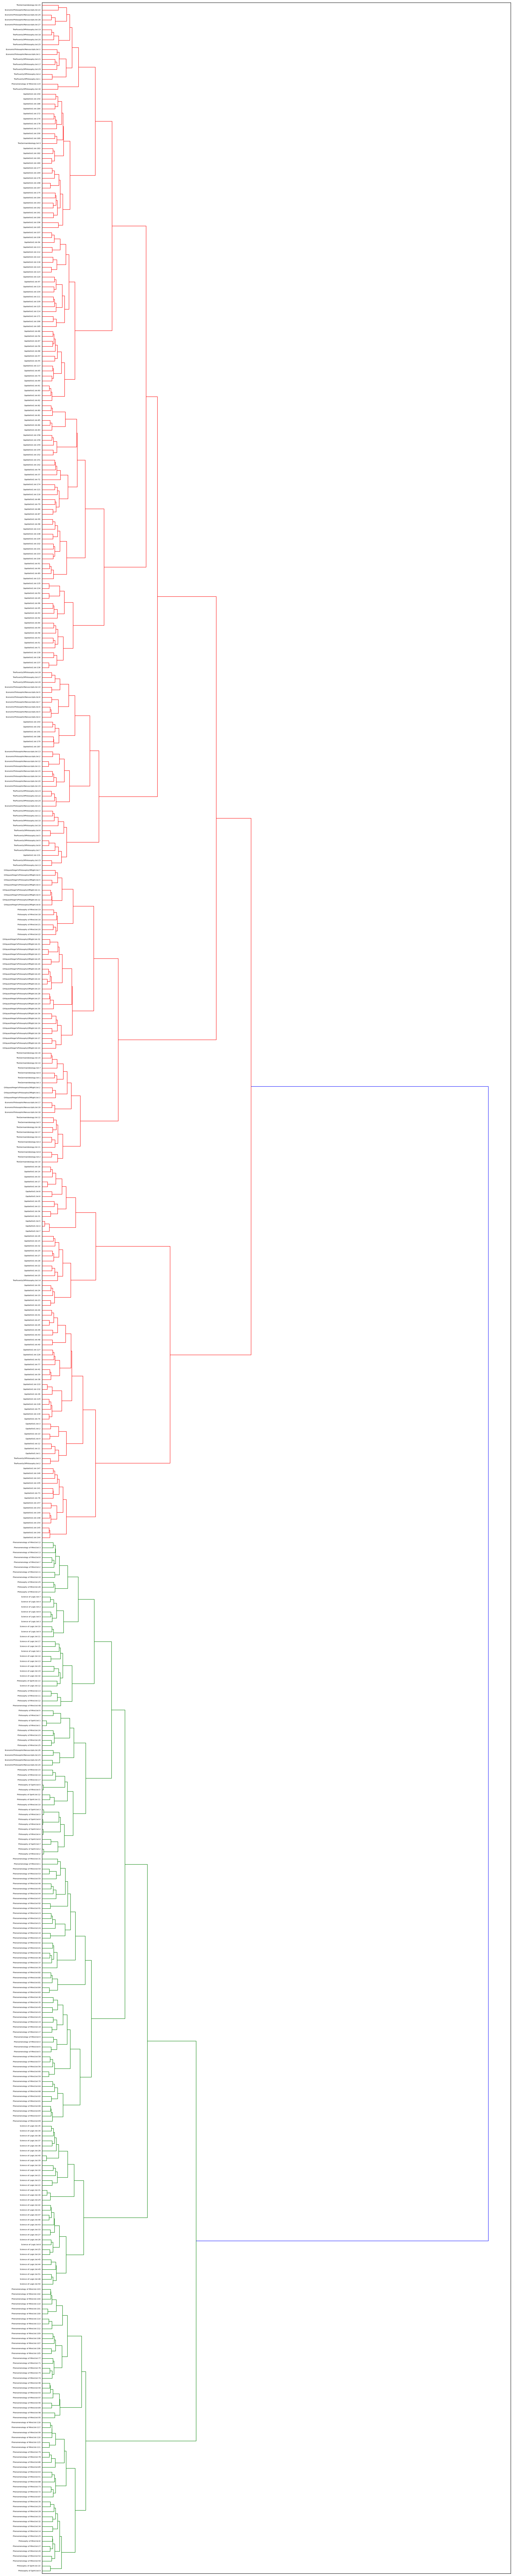

In [32]:
fig, ax = plt.subplots(figsize=(20, 100)) # set size
ax = dendrogram(dist_matrix, orientation="right", labels=ids);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout
